In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
#load the file
sample_json_df = pd.read_json('/Users/lacivert/loans.json')

In [3]:
#assign DataFrame
df = pd.DataFrame(sample_json_df)

In [4]:
#list column names
list(df.columns.values)

['10yr', '1mo', '3mo']

In [5]:
#sanity check
df.head()

,10yr,1mo,3mo
0,5.070,3.670,3.540
1,5.110,3.650,3.530
2,5.170,3.650,3.530
3,5.200,3.630,3.520
4,5.190,3.620,3.520


In [9]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['10yr']
X = df[['1mo','3mo']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [0.03483721 0.47890829]

Intercept: 
 2.6478372830098165

R-squared:
0.5415955903056106


In [26]:
#further analysis by setting up my variables
ten_year, one_month, three_month = df.loc[:,'10yr'], df.loc[:,'1mo'], df.loc[:,'3mo']

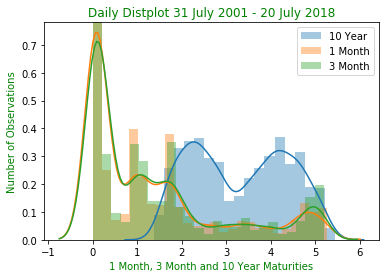

In [27]:
# visualizing my variables
sns.distplot(ten_year, label='10 Year')
sns.distplot(one_month,label='1 Month')
sns.distplot(three_month,label='3 Month')
plt.xlabel('1 Month, 3 Month and 10 Year Maturities',color='green')
plt.ylabel('Number of Observations',color='green')
plt.title('Daily Distplot 31 July 2001 - 20 July 2018', color='green')
plt.legend()

In [30]:
# normality testing . . . a normal distribution has skewness of zero
from scipy.stats import skew
from scipy.stats import kurtosis
skew (one_month), skew (three_month), skew (ten_year)
skew (one_month), skew (three_month), skew (ten_year)

(1.3123503068846365, 1.2682673047692128, 0.05745813024116081)

In [25]:
#  normal distribution has kurtosis of three
kurtosis (one_month), kurtosis (three_month), kurtosis (ten_year)

(0.5876129698507286, 0.44303931310769773, -1.3130931069192109)

In [34]:
# Jacques Bera test of Normality and goodness of fit 
# demonstrates large results deviating substantially from a normal distribution
from scipy import stats
stats.jarque_bera(one_month), stats.jarque_bera(three_month), stats.jarque_bera(ten_year)

((1278.9714349747903, 0.0),
 (1172.1803127649432, 0.0),
 (307.1612456774129, 0.0))

In [38]:
df.describe()

,10yr,1mo,3mo
count,4243.000,4243.000,4243.000
mean,3.307,1.228,1.287
std,1.081,1.525,1.550
min,1.370,0.000,0.000
25%,2.320,0.060,0.090
50%,3.340,0.680,0.790
75%,4.240,1.730,1.790
max,5.440,5.270,5.190


In [43]:
# zero rates are one of the problems for the one month and three month yield curve rates
np.count_nonzero(one_month == 0), np.count_nonzero(three_month == 0), np.count_nonzero(ten_year == 0)

(88, 16, 0)